### 1.Detecting HeartStroke
    
- This dataset hold 5110 records , need to predict the stroke of person.We are using binary classification using Logistic Regression.
- Source of dataset is from Kaggle and file is is placed in my git.
- Target variable is STROKE and model predicts either person has stroke or not.
- Below values denote STROKE
    - STROKE - 1
    -NO STROKE - 0
    
  


### Challenge : Data is overfitted using  Decision Tree where  ROC_AUC_SCORE=1 for given data set.

### DataSet :https://raw.githubusercontent.com/soletian11/strokedetect/main/healthcare-dataset-stroke-data.csv

## 2.Data Cleaning and Preparartion

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,auc
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.metrics import mean_squared_error 

- Download Data Set(Having 5110 Records)
- Re-encoding the Categorical Variables
- Splitting the data ser 60/20/20 between Train , Test and Val

In [68]:
data='https://raw.githubusercontent.com/soletian11/strokedetect/main/healthcare-dataset-stroke-data.csv'

In [69]:
df=pd.read_csv(data)
df.columns=df.columns.str.lower()


In [70]:
numerical=[ 'age',  'hypertension',  'heart_disease',  'avg_glucose_level',  'bmi']
categorical=['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

## Imposing  Rules on Dataset:
   

### Data Cleansing and EDA
 - Having NAN in  BMI  column and count is 201.So taking AVG of BMI and adding to NAN's
 - Also having 'OTHER' record for gender and removing from dataset , so count decerases to 5109
 - Identifying NULL's
 - Identifying JUNK record using gender value counts and cleaning up.
 - converting categorical columnvalues to lower case and adding underscore for empty space
 - Rounding Age from float to int's

In [71]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [72]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [73]:
df=df[df['gender']!='Other'].reset_index(drop=True)

In [74]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

### Feature Importance :Churn Rate and risk ratio

In [75]:
df['age']=df['age'].round()

In [76]:
for col in categorical:
    df[col]=df[col].str.lower().str.replace(' ','_')

In [77]:
df_full_train, df_test=train_test_split(df,test_size=0.2,random_state=42)
df_train, df_val=train_test_split(df_full_train,test_size=0.25,random_state=42)
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
y_train=df_train['stroke'].values
y_full_train=df_full_train['stroke'].values
y_test=df_test['stroke'].values
y_val=df_val['stroke'].values

del df_train['stroke']
del df_test['stroke']
del df_val['stroke']

In [78]:
global_stroke_rate=df_full_train['stroke'].mean()
round(global_stroke_rate,2)
for c in categorical:
    print("column :", c)
    df_group=df_full_train.groupby(c)['stroke'].agg(['mean','count'])
    df_group['risk']=df_group['mean']/global_stroke_rate
    df_group['diff']=df_group['mean']-global_stroke_rate
    print(df_group)
    
    print("\n")

column : gender
            mean  count      risk      diff
gender                                     
female  0.044509   2404  0.972775 -0.001246
male    0.047534   1683  1.038888  0.001779


column : ever_married
                  mean  count      risk      diff
ever_married                                     
no            0.017630   1418  0.385325 -0.028124
yes           0.060697   2669  1.326568  0.014942


column : work_type
                   mean  count      risk      diff
work_type                                         
children       0.003610    554  0.078901 -0.042145
govt_job       0.047081    531  1.028984  0.001326
never_worked   0.000000     18  0.000000 -0.045755
private        0.048048   2331  1.050120  0.002293
self-employed  0.073507    653  1.606538  0.027752


column : residence_type
                    mean  count      risk      diff
residence_type                                     
rural           0.042352   2007  0.925624 -0.003403
urban           0.049038

## Features Importance 
    - For Categorical
    - For Numerical

### Categorical  Features Importance

In [79]:
feature_scores=[]
for c in categorical:
     feature_scores.append((c,mutual_info_score(df[c],df['stroke'])))
columns=['categorical_var','mutual_score']
df_col_mutual_scores=pd.DataFrame(feature_scores, columns=columns)
df_col_mutual_scores.sort_values('mutual_score')

,categorical_var,mutual_score
0,gender,0.000041
3,residence_type,0.000119
4,smoking_status,0.002757
2,work_type,0.006827
1,ever_married,0.006945


### Numerical  Features Importance

In [80]:
df[numerical].corrwith(df.stroke)

age                  0.245225
hypertension         0.127891
heart_disease        0.134905
avg_glucose_level    0.131991
bmi                  0.038917
dtype: float64

### One Hot Encoding

In [81]:
train_dicts=df_train[categorical+numerical].to_dict(orient='records')
test_dicts=df_test[categorical+numerical].to_dict(orient='records')
val_dicts=df_val[categorical+numerical].to_dict(orient='records')
dv=DictVectorizer(sparse=False)
X_train=dv.fit_transform(train_dicts)
X_val=dv.transform(val_dicts)
X_test=dv.transform(test_dicts)


In [82]:
dv.get_feature_names()

['age',
 'avg_glucose_level',
 'bmi',
 'ever_married=no',
 'ever_married=yes',
 'gender=female',
 'gender=male',
 'heart_disease',
 'hypertension',
 'residence_type=rural',
 'residence_type=urban',
 'smoking_status=formerly_smoked',
 'smoking_status=never_smoked',
 'smoking_status=smokes',
 'smoking_status=unknown',
 'work_type=children',
 'work_type=govt_job',
 'work_type=never_worked',
 'work_type=private',
 'work_type=self-employed']

### Expermimenting with Logistis Regression

In [83]:
model=LogisticRegression(max_iter=1000,class_weight='balanced',solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [84]:
y_pred_val=model.predict_proba(X_val)[:,1]# Soft Predictions- Score

y_pred_val

array([0.06795121, 0.80133914, 0.36667226, ..., 0.59418214, 0.29361164,
       0.09001018])

In [85]:
stroke_decision=y_pred_val>0.45

### Experimenting Thresholds

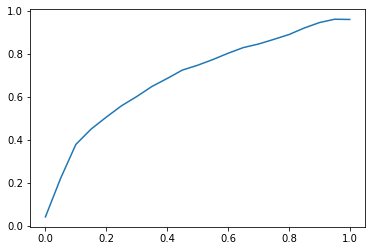

In [86]:
scores=[]
thresholds=np.linspace(0,1,21)
for i in thresholds:
    stroke_threshold=y_pred_val>i
    score=(stroke_threshold==y_val).mean()
#     print('%.2f,%.3f' %(i,score))
    scores.append((score))
plt.plot(thresholds,scores)

Best Threshold=0.454416, G-Mean=0.775


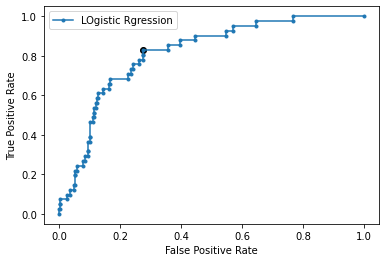

In [87]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)
from numpy import sqrt
from numpy import argmax
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.plot(fpr, tpr, marker='.', label='LOgistic Rgression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

In [88]:
(stroke_decision==y_val).sum()

740

### Testing Predictions 

In [89]:
df_pred = pd.DataFrame({'probability':y_pred_val, 'prediction':stroke_decision.astype(int),'actual':y_val})

df_pred['correct']=(df_pred['prediction']==df_pred['actual'])
df_pred

,probability,prediction,actual,correct
0,0.067951,0,0,True
1,0.801339,1,1,True
2,0.366672,0,0,True
3,0.159204,0,0,True
4,0.038335,0,0,True
...,...,...,...,...
1017,0.430161,0,0,True
1018,0.176944,0,0,True
1019,0.594182,1,0,False
1020,0.293612,0,0,True


In [90]:
df_pred['correct'].mean()

0.7240704500978473

In [91]:
t=0.45
actual_positive=(y_val==1)
actual_negative=(y_val==0)

predict_positive=(y_pred_val>=t)
predict_negative=(y_pred_val<t)

predict_positive[:5]

array([False,  True, False, False, False])

In [92]:
unique, counts = np.unique(actual_positive, return_counts=True)
unique, counts

(array([False,  True]), array([981,  41]))

In [93]:
unique, counts = np.unique(predict_positive, return_counts=True)
unique, counts

(array([False,  True]), array([713, 309]))

In [94]:
tp=(predict_positive &actual_positive).sum()
tp

34

In [95]:
tp=(predict_positive &actual_positive).sum()
tn=(predict_negative &actual_negative  ).sum()
fp=(predict_positive &actual_negative ).sum()
fn=(predict_negative &actual_positive  ).sum()

In [96]:
confusion_matrix=np.array([
    [tn, fp],
     [fn,tp]
    
])
confusion_matrix

array([[706, 275],
       [  7,  34]])

### ROC Curve for Logistic Regression

In [97]:
scores=[]
for t in np.linspace(0,1,101,):  
    actual_positive=(y_val==1)
    actual_negative=(y_val==0)
    predict_positive=(y_pred_val>=t)
    predict_negative=(y_pred_val<t)
    tp=(predict_positive &actual_positive).sum()
    tn=(predict_negative &actual_negative  ).sum()
    fp=(predict_positive &actual_negative ).sum()
    fn=(predict_negative &actual_positive  ).sum()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    scores.append((t,tp,tn,fp,fn,tpr,fpr))

columns=['threshold','tp','tn','fp','fn','tpr','fpr']
df_roc_curve=pd.DataFrame(scores, columns=columns)
df_roc_curve

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.00,41,0,981,0,1.00000,1.000000
1,0.01,41,0,981,0,1.00000,1.000000
2,0.02,41,2,979,0,1.00000,0.997961
3,0.03,41,53,928,0,1.00000,0.945973
4,0.04,41,140,841,0,1.00000,0.857288
...,...,...,...,...,...,...,...
96,0.96,1,981,0,40,0.02439,0.000000
97,0.97,1,981,0,40,0.02439,0.000000
98,0.98,0,981,0,41,0.00000,0.000000
99,0.99,0,981,0,41,0.00000,0.000000


Text(0, 0.5, 'FPR/TPR')

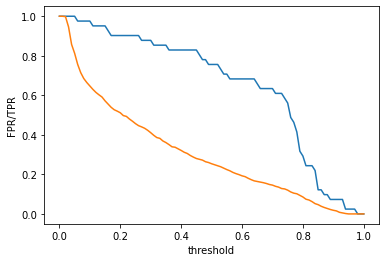

In [98]:
plt.plot(df_roc_curve['threshold'],df_roc_curve['tpr'], label='TPR')
plt.plot(df_roc_curve['threshold'],df_roc_curve['fpr'],label='FPR')
plt.xlabel("threshold")
plt.ylabel("FPR/TPR")

##  On Full Train and Test Data Set

In [100]:
del df_full_train['stroke']
full_train_dicts=df_full_train[categorical+numerical].to_dict(orient='records')
test_dicts=df_test[categorical+numerical].to_dict(orient='records')
X_full_train=dv.fit_transform(full_train_dicts)
# 0.01, 0.1, 0.5, 10
model=LogisticRegression(solver='liblinear', C=10, max_iter=1000)
model.fit(X_train,y_train)
model.fit(X_full_train, y_full_train)

LogisticRegression(C=10, max_iter=1000, solver='liblinear')

In [102]:
y_pred_test=model.predict_proba(X_test)[:,1]# Soft Predictions- Score
stroke_decision1=y_pred_test>0.45
stroke_decision1=stroke_decision1.astype(int)

In [104]:
auc=roc_auc_score(y_test, stroke_decision1)
#   print('%s, %.2f' % (n, auc))
print('%.2f' % (auc))

0.50


###  Modeling Using Decision Tree Classifier

In [106]:
from sklearn.tree  import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [107]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [108]:
y_pred=dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.5456477959275006

### Overfitting

In [116]:
y_pred_train=dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred_train)

1.0

### Hyper Parameter Tuning using different params


In [117]:
dt=DecisionTreeClassifier(max_depth=10)
dt.fit(X_train,y_train)
y_pred=dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)
print(f"ROC AUC SCORE FOR VAL DATASET :{roc_auc_score(y_val,y_pred)}")

ROC AUC SCORE FOR VAL DATASET :0.6116953830088759


In [118]:
from sklearn.tree import export_text

In [119]:
print(export_text(dt,feature_names=dv.get_feature_names()))

|--- age <= 67.50
|   |--- age <= 47.50
|   |   |--- bmi <= 56.30
|   |   |   |--- age <= 37.50
|   |   |   |   |--- age <= 1.50
|   |   |   |   |   |--- bmi <= 26.90
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- bmi >  26.90
|   |   |   |   |   |   |--- gender=male <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- gender=male >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  37.50
|   |   |   |   |--- avg_glucose_level <= 58.14
|   |   |   |   |   |--- avg_glucose_level <= 57.94
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- avg_glucose_level >  57.94
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- avg_glucose_level >  58.14
|   |   |   |   |   |--- smoking_status=formerly_smoked <= 0.50
|   |   |   |   |   |   |--- avg_glucose_level <= 83.43
|   |   |   |   |   |   |   |--- avg_glucose_level <= 83.36
|   |   |   |   |   | 

In [120]:
dt_metrics=[]
for i in range(1,101,1):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    y_pred=dt.predict_proba(X_val)[:,1]
    auc=roc_auc_score(y_val,y_pred)
    dt_metrics.append((i,auc))
#     print(f"ROC AUC SCORE FOR TRAIN DATASET :{roc_auc_score(y_train,y_pred_train)}")
#     print(f"ROC AUC SCORE FOR VAL DATASET :{roc_auc_score(y_val,y_pred)}")
columns=['depth','auc']
df_maxd=pd.DataFrame(dt_metrics,columns=columns)
df_maxd.sort_values(by='auc', ascending=False)
##Max depth is 4,3,5

,depth,auc
1,2,0.789376
2,3,0.785025
3,4,0.764675
4,5,0.762189
5,6,0.731819
...,...,...
34,35,0.546157
26,27,0.544628
35,36,0.544119
83,84,0.534982


In [121]:
dt_metrics=[]
for depth in [4,3,2]:
    for i in range(1,1000,100):
        dt=DecisionTreeClassifier(max_depth=depth, min_samples_leaf=i)
        dt.fit(X_train,y_train)
        y_pred=dt.predict_proba(X_val)[:,1]
        auc=round(roc_auc_score(y_val,y_pred),3)
        dt_metrics.append((depth,i,auc))
#     print(f"ROC AUC SCORE FOR TRAIN DATASET :{roc_auc_score(y_train,y_pred_train)}")
#     print(f"ROC AUC SCORE FOR VAL DATASET :{roc_auc_score(y_val,y_pred)}")
columns=['depth','sample_leaf','auc']
df_maxd=pd.DataFrame(dt_metrics,columns=columns)
df_maxd.sort_values(by='auc', ascending=False)


,depth,sample_leaf,auc
4,4,401,0.816
3,4,301,0.813
13,3,301,0.810
14,3,401,0.809
12,3,201,0.803
11,3,101,0.801
2,4,201,0.801
5,4,501,0.801
15,3,501,0.795
6,4,601,0.792


In [122]:
df_maxd_pivot=df_maxd.pivot(index='sample_leaf', columns=['depth'])

<AxesSubplot:xlabel='None-depth', ylabel='sample_leaf'>

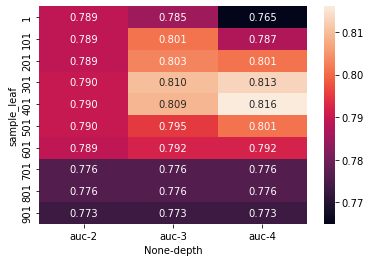

In [123]:
sns.heatmap(df_maxd_pivot,annot=True,fmt='.3f')

### Tuned Model of Decision Tree

In [124]:
dt=DecisionTreeClassifier(max_depth=4,min_samples_leaf=401)
dt.fit(X_train,y_train)
y_pred=dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)
print(f"ROC AUC SCORE FOR VAL DATASET :{roc_auc_score(y_val,y_pred)}")

ROC AUC SCORE FOR VAL DATASET :0.8164018796151264


### Random Forest Implementation

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf=RandomForestClassifier(n_estimators=10,random_state=1)

In [127]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [128]:
y_pred=rf.predict_proba(X_val)[:,1]
y_pred

array([0. , 0. , 0. , ..., 0.1, 0.1, 0. ])

In [129]:
roc_auc_score(y_val,y_pred)

0.7211904229134035

## Hyper Parameter Tuning for RF

In [130]:
rf_metrics=[]

for i in range(10,301, 10):
    rf=RandomForestClassifier(n_estimators=i,random_state=1)
    rf.fit(X_train,y_train)
    y_pred=rf.predict_proba(X_val)[:,1]
    roc=roc_auc_score(y_val,y_pred)
    rf_metrics.append((i,roc))
columns=['estimators','auc_score']
df_rf_metrics=pd.DataFrame(rf_metrics,columns=columns)
df_rf_metrics.sort_values('auc_score',ascending=False)

    

,estimators,auc_score
20,210,0.775391
24,250,0.774769
23,240,0.774769
25,260,0.774558
26,270,0.774098
17,180,0.774048
22,230,0.773688
21,220,0.773452
27,280,0.772880
18,190,0.771935


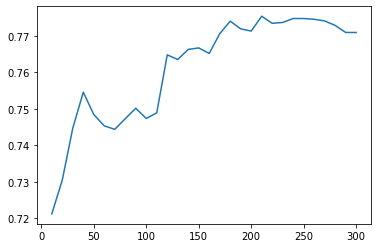

In [131]:
plt.plot(df_rf_metrics.estimators,df_rf_metrics.auc_score )

### Adding Max Depth Hyper Paramter

In [132]:


rf_metrics=[]
for depth in [5,10,15]:
    for i in range(10,301, 10):
        rf=RandomForestClassifier(n_estimators=i,random_state=1,max_depth=depth)
        rf.fit(X_train,y_train)
        y_pred=rf.predict_proba(X_val)[:,1]
        roc=roc_auc_score(y_val,y_pred)
        rf_metrics.append((depth,i,roc))
columns=['depth','estimators','auc_score']
df_rf_metrics=pd.DataFrame(rf_metrics,columns=columns)
df_rf_metrics.sort_values('auc_score',ascending=False)


,depth,estimators,auc_score
2,5,30,0.822990
4,5,50,0.820566
3,5,40,0.819224
1,5,20,0.819012
0,5,10,0.818130
...,...,...,...
62,15,30,0.752132
64,15,50,0.744748
63,15,40,0.740111
61,15,20,0.698864


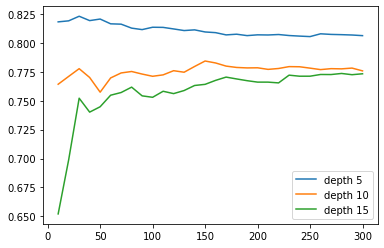

In [133]:
for d in [5,10,15]:
    df_data=df_rf_metrics[df_rf_metrics.depth==d]
    plt.plot(df_data.estimators,df_data.auc_score, label='depth %d' % d)
plt.legend()

In [134]:
max_depth=5

In [135]:
rf_metrics=[]
for k in range(1,100,10):
    for i in range(10,301, 10):
        rf=RandomForestClassifier(n_estimators=i,random_state=1,
                                  max_depth=max_depth,
                                  n_jobs=2,
                                  min_samples_leaf=k,
                                  max_features=9
                                 )
        rf.fit(X_train,y_train)
        y_pred=rf.predict_proba(X_val)[:,1]
        roc=roc_auc_score(y_val,y_pred)
        rf_metrics.append((k,max_depth,i,roc))
    columns=['min_samples','depth','estimators','auc_score']
df_rf_metrics=pd.DataFrame(rf_metrics,columns=columns)
df_rf_metrics.sort_values('auc_score',ascending=False)


,min_samples,depth,estimators,auc_score
101,31,5,120,0.824271
102,31,5,130,0.824221
103,31,5,140,0.824122
100,31,5,110,0.823823
104,31,5,150,0.823127
...,...,...,...,...
0,1,5,10,0.807277
180,61,5,10,0.805661
210,71,5,10,0.804356
30,11,5,10,0.803076


In [136]:
max_depth=5
min_samples_leaf=21 
estimators=210

In [137]:
rf_metrics=[]
for i in range(1, 15,1):
    rf=RandomForestClassifier(n_estimators=estimators,random_state=1,
        max_depth=max_depth,
        n_jobs=2,
        min_samples_leaf=min_samples_leaf,
        max_features=i
        )
    rf.fit(X_train,y_train)
    y_pred=rf.predict_proba(X_val)[:,1]
    roc=roc_auc_score(y_val,y_pred)
    rf_metrics.append((min_samples_leaf,max_depth,estimators,i,roc))
columns=['min_samples','depth','estimators','features','auc_score']
df_rf_metrics=pd.DataFrame(rf_metrics,columns=columns)
df_rf_metrics.sort_values('auc_score',ascending=False)

,min_samples,depth,estimators,features,auc_score
9,21,5,210,10,0.824445
10,21,5,210,11,0.823699
7,21,5,210,8,0.822232
12,21,5,210,13,0.820989
11,21,5,210,12,0.820169
6,21,5,210,7,0.819945
8,21,5,210,9,0.819099
13,21,5,210,14,0.817981
5,21,5,210,6,0.815345
4,21,5,210,5,0.814898


In [138]:
import pickle

In [139]:
max_depth=5
min_samples_leaf=21 
estimators=210
max_features=9

### Hyper Tuned Model for RandomForest

In [140]:
def train(df_train,y_train):
    train_dicts=df_train[numerical+categorical].to_dict(orient='records')
    dv=DictVectorizer(sparse=False)
    X_train=dv.fit_transform(train_dicts)    
    model_rf=RandomForestClassifier(n_estimators=estimators,random_state=1,
        max_depth=max_depth,
        n_jobs=2,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features
        )
    model_rf.fit(X_train,y_train)
    return model_rf,dv

def predict(df,dv,model):
    dicts=df[numerical+categorical].to_dict(orient='records')
    X=dv.transform(dicts)
    y_pred=model.predict_proba(X)[:,1]
    #y_pred=model.predict(X)
    
    return y_pred

In [141]:
model_rf,dv=train(df_train,y_train)
y_pred=predict(df_val,dv,model_rf)
roc_auc_score(y_val,y_pred)

0.8190994753984236

In [142]:
ouput_file=f'model_rf.bin'
ouput_file

'model_rf.bin'

In [143]:
with open(ouput_file,'wb') as f_out:
    pickle.dump((dv,model_rf),f_out)

In [144]:
input_file='model_rf.bin'

with open (input_file,'rb') as f_in:
    dv,model=pickle.load(f_in)

In [145]:
dv,model

(DictVectorizer(sparse=False),
 RandomForestClassifier(max_depth=5, max_features=9, min_samples_leaf=21,
                        n_estimators=210, n_jobs=2, random_state=1))

In [172]:
patient={"gender": "female",
  "ever_married": "yes",
  "work_type": "self-employed",
  "residence_type": "urban",
  "smoking_status": "smokes",
  "age": 76.0,
  "hypertension": 1,
  "heart_disease": 1,
  "avg_glucose_level": 199.86,
  "bmi": 28.9456}

X=dv.transform(patient)
model.predict_proba(X)

array([[0.7680874, 0.2319126]])

In [147]:
y_val

array([0, 1, 0, ..., 0, 0, 0])

In [148]:
y_pred

array([0.0021396 , 0.11749098, 0.02856379, ..., 0.06136582, 0.01585977,
       0.00394285])

In [149]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

Best Threshold=0.081383, G-Mean=0.747


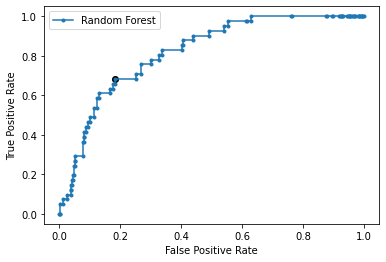

In [150]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
from numpy import sqrt
from numpy import argmax
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

In [163]:
# indices = np.where((y_pred>=0.087))
# indices

y_pred

array([False,  True, False, ..., False, False, False])

In [153]:
y_val

array([0, 1, 0, ..., 0, 0, 0])

In [154]:
df[df['id']==4712]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
103,4712,female,81.0,0,1,yes,self-employed,rural,78.7,19.4,unknown,1


In [155]:
mse=mean_squared_error(y_val, y_pred) 
mse

0.03635748195213598

In [168]:
importances=list(rf.feature_importances_)
features=list(dv.get_feature_names())
df_imp_features=pd.DataFrame({ 'features': features,'importances': importances})
df_imp_features.sort_values('importances', ascending=False).iloc[0:5]

,features,importances
0,age,0.518711
1,avg_glucose_level,0.202577
2,bmi,0.106374
8,hypertension,0.031942
7,heart_disease,0.022469


### Testing a record from Test Validation

In [178]:
patient={"gender": "female",
  "ever_married": "yes",
  "work_type": "self-employed",
  "residence_type": "urban",
  "smoking_status": "unknown",
  "age": 97,
  "hypertension": 0,
  "heart_disease": 1,
  "avg_glucose_level": 78.7,
  "bmi": 19.4}

X=dv.transform(patient)
model.predict_proba(X)

array([[0.87744824, 0.12255176]])